# YuGiOh

## Creazione del dataset

Il **dataset** che viene utilizzato in questo notebook viene creato in modo dinamico dal file `setup.py`, che va a fare delle richieste HTTP ad una [API](https://ygoprodeck.com/api-guide/) per ricavare i seguenti campi:
* nome [`NAME`]
* tipo [`TYPE`]
* attributo [`ATTRIBUTE`]
* razza [`RACE`]
* livello [`LEVEL`]
* attacco [`ATK`]
* difesa [`DEF`]
* prezzo su Cardmarket [`CARDMARKET_PRICE`]
* prezzo su TcgPlayer [`TCGPLAYER_PRICE`]
* prezzo su Ebay [`EBAY_PRICE`]
* prezzo su Amazon [`AMAZON_PRICE`]
* prezzo su CoolStuffINC [`COOLSTUFFINC_PRICE`]

In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

with open("../dataset.csv", "r") as f:
    data = pd.read_csv(f, delimiter=";", decimal=".")

len(data)

12612

Il dataset contiene $12612$ record, ognuno con i $12$ campi sopra descritti, anche se molte carte hanno dei valori `NaN`: questo é dato dal fatto che le carte sono molto varie e, ad esempio, una carta `Mostro` possiede la caratteristica di attacco che invece una carta `Magia` non ha

## Tipi di carte

Andiamo ad analizzare i vari **tipi di carte** che andiamo a trovare all'interno del gioco

Grazie al campo `TYPE` riusciamo a fare una prima divisione tra tutte le carte presenti nel gioco, dividendole prima in **carte mostro**, **carte magia** e **carte trappola**, e poi le carte mostro in sotto-categorie come **mostri normali** o **mostri con effetto**

In [361]:
card_type = data["TYPE"].dropna()
card_type_unique = card_type.unique()
len(card_type_unique), card_type_unique

(28,
 array(['Spell Card', 'Effect Monster', 'Normal Monster',
        'Flip Effect Monster', 'Trap Card', 'Union Effect Monster',
        'Fusion Monster', 'Pendulum Effect Monster', 'Link Monster',
        'XYZ Monster', 'Synchro Monster', 'Synchro Tuner Monster',
        'Tuner Monster', 'Gemini Monster', 'Normal Tuner Monster',
        'Spirit Monster', 'Ritual Effect Monster', 'Skill Card', 'Token',
        'Pendulum Effect Fusion Monster', 'Ritual Monster', 'Toon Monster',
        'Pendulum Normal Monster', 'Synchro Pendulum Effect Monster',
        'Pendulum Tuner Effect Monster', 'XYZ Pendulum Effect Monster',
        'Pendulum Effect Ritual Monster', 'Pendulum Flip Effect Monster'],
       dtype=object))

Vediamo il numero di carte che sono state rilasciate per tipo

In [362]:
count = card_type.value_counts()
count

TYPE
Effect Monster                     4513
Spell Card                         2432
Trap Card                          1844
Normal Monster                      657
XYZ Monster                         488
Fusion Monster                      438
Tuner Monster                       434
Synchro Monster                     399
Link Monster                        378
Pendulum Effect Monster             254
Flip Effect Monster                 178
Skill Card                          124
Ritual Effect Monster               111
Token                               107
Gemini Monster                       45
Pendulum Normal Monster              40
Union Effect Monster                 36
Spirit Monster                       33
Synchro Tuner Monster                23
Toon Monster                         17
Ritual Monster                       15
Normal Tuner Monster                 10
Pendulum Effect Fusion Monster       10
XYZ Pendulum Effect Monster           9
Pendulum Tuner Effect Monster      

Notiamo come le prime $4$ posizioni sono presenti le $4$ carte che hanno dominato il gioco dalla sua nascita:
* **carte mostro con effetto**
* **carte magia**
* **carte trappola**
* **carte mostro normali**

Con il tempo sono state introdotte sempre più carte, ma vista la tardiva introduzione le troviamo nelle posizioni più basse della "classifica"

Il fatto che una carta sia "storica" non significa però che il suo tipo sia nelle prime posizioni: infatti, le carte `toon` e le carte `rituale` hanno rispettivamente $17$ e $15$ occorrenze, ma sono state tra le primissime carte inserite nel gioco

Andiamo a considerare solo i tipi che hanno almeno $100$ carte per avere un grafico più chiaro e leggibile

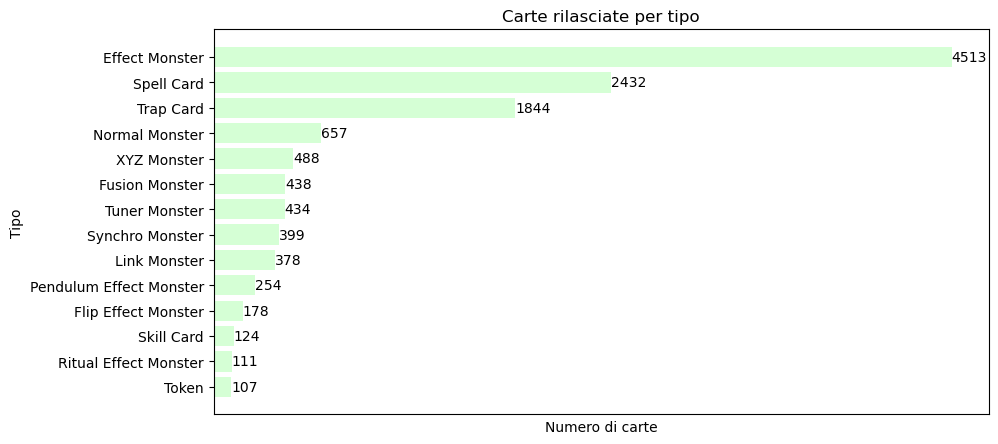

In [363]:
restricted_counts = count.sort_values(ascending=True)[count >= 100]
x = restricted_counts.values
y = restricted_counts.index

plt.title("Carte rilasciate per tipo")
plt.xlabel("Numero di carte")
plt.ylabel("Tipo")
plt.gcf().set_size_inches(10,5)
plt.xticks([])

bar = plt.barh(y, x, color="#d5ffd5")
plt.bar_label(bar)
plt.show()
#plt.savefig("type.png", dpi=300, bbox_inches='tight', transparent=True)

Infine, raggruppiamo questi $28$ tipi in $3$ grandi categorie:
* **carte mostro**
* **carte magia e trappola**
* **token e carte skill**

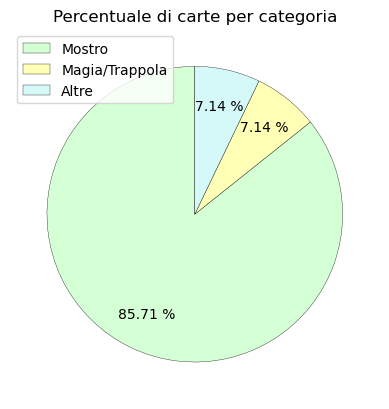

In [364]:
monster = [t for t in card_type_unique if "Monster" in t]
spelltrap = [t for t in card_type_unique if "Trap" in t or "Spell" in t]
other = [t for t in card_type_unique if t not in monster and t not in spelltrap]

plt.title("Percentuale di carte per categoria")

y = [len(monster), len(spelltrap), len(other)]
label = ["Mostro", "Magia/Trappola", "Altre"]
palette = ["#d5ffd5", "#ffffb6", "#d5f9f9"]

plt.pie(y, startangle=90, autopct="%.2f %%", pctdistance=0.75, colors=palette, wedgeprops={"linewidth": .25, "edgecolor": "#000000"})
plt.legend(label)
plt.show()
#plt.savefig("pie.png", dpi=300, bbox_inches='tight', transparent=True)

## Razza e attributo

Altre due caratteristiche importanti che usiamo per suddividere le carte sono la "**razza**" e l'**attributo**, definite dai seguenti campi del dataset:
* `RACE` rappresenta quello che la carta è nello specifico, ad esempio `beast`, `insect` o `machine`
* `ATTRIBUTE` rappresenta categorie più astratte e generiche, come ad esempio `EARTH`, `WATER` o `FIRE`

### Attributo

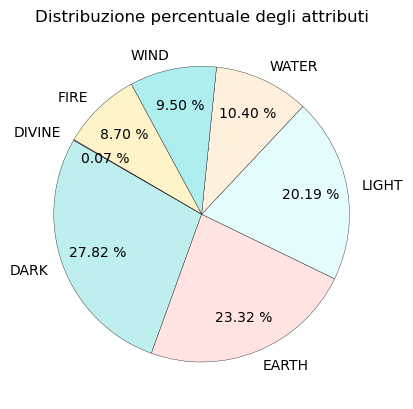

In [366]:
attribute = data["ATTRIBUTE"].dropna()
attribute_counts = attribute.value_counts()

plt.title("Distribuzione percentuale degli attributi")
palette = ["#bfeeee", "#ffe4e1", "#e5fcff", "#fff0de", "#afeeee", "#fff3ca", "#ddb5e8"]

attribute_counts.plot.pie(startangle=150, autopct="%.2f %%", pctdistance=0.75, colors=palette, wedgeprops={"linewidth": .25, "edgecolor": "#000000"})
plt.ylabel("")
plt.show()
#plt.savefig("pie.png", dpi=300, bbox_inches='tight', transparent=True)

Abbiamo un attributo molto particolare, che è quello `DIVINE`, presente con lo $0.07$\% poichè è un attributo delle carte divinità, presenti in pochissime copie all'interno del gioco

In [ ]:
name_attribute = data[["NAME", "ATTRIBUTE"]].dropna()
name_attribute = name_attribute[name_attribute["ATTRIBUTE"] == "DIVINE"]
for name in name_attribute["NAME"]:
    print(name)

Holactie the Creator of Light
Obelisk the Tormentor
Slifer the Sky Dragon
The Winged Dragon of Ra
The Winged Dragon of Ra - Immortal Phoenix
The Winged Dragon of Ra - Sphere Mode


### Razza

In [ ]:
race = data["RACE"].dropna()
race_counts = race.value_counts().sort_values(ascending=False)
print(race_counts, "\n\n")

print(f"Prime 3 razze:\n{race_counts[:3]}\n\n")
print(f"Numero di razze appartenenti a solo una carta: {len(race_counts[race_counts == 1])}")

RACE
Normal           2132
Warrior          1057
Machine           945
Continuous        919
Fiend             798
                 ... 
Tea Gardner         1
Lumis and Umb       1
Emma                1
Lumis Umbra         1
Chumley Huffi       1
Name: count, Length: 86, dtype: int64 


Prime 3 razze:
RACE
Normal     2132
Warrior    1057
Machine     945
Name: count, dtype: int64


Numero di razze appartenenti a solo una carta: 17


Abbiamo una differenza enorme tra la prima classificata e le ultime classificate, ma per chi ha giocato a questo gioco questa differenza risulta normale:
* le prime classificate rappresentano le primissime carte che sono state introdotte nel gioco, andando a formare dei mazzi storici come quello `normale`, `guerriero` e `macchina`
* le ultime clasificate sono rappresentate da una carta mostro effetto e dalle carte skill, carte particolari introdotte nel gioco con una `RACE` tutta loro

In [ ]:
race_type = data[["TYPE", "RACE"]].dropna()
races = race[race == 1]

type = set()
for race in races.index:
    type.add(race_type[race_type["RACE"] == race]["TYPE"].values[0])

print(f"TYPE delle carte che hanno RACE unico: {type}")

TYPE delle carte che hanno RACE unico: {'Skill Card', 'Effect Monster'}


Visto che l'insieme contiene un discreto numero di valori diversi, ovvero $86$, prendiamo un sottoinsieme di `ATTRIBUTE` molto piccolo, come `DIVINE`,  per vedere a quale `RACE` appartengono

In [ ]:
race_divine = data[["ATTRIBUTE", "RACE"]].dropna()
race_divine = race_divine[race_divine["ATTRIBUTE"] == "DIVINE"]
race_divine

,ATTRIBUTE,RACE
5339,DIVINE,Creator-God
7871,DIVINE,Divine-Beast
9919,DIVINE,Divine-Beast
11109,DIVINE,Divine-Beast
11110,DIVINE,Divine-Beast
11111,DIVINE,Divine-Beast


Andiamo a ritrovare la "razza" `Creator-God`, una delle poche razze a comparire in singola copia, e tutte le `Divine-Beast`

## Livello

Il **livello** di una carta definisce spesso quanto questa carta è forte, in termini di attacco, difesa o offetto al quale esso è collegato, ma siamo sicuri che sia sempre così?

### Livello e attacco

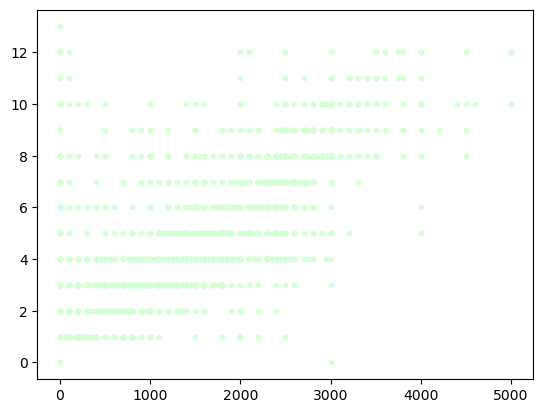

Indice di correlazione: 0.7233701304400515


In [ ]:
atk_level = data[["ATK", "LEVEL"]].dropna()
atk = atk_level["ATK"]
level = atk_level["LEVEL"]

plt.scatter(atk, level, color='#d5ffd5', marker=".")
plt.show()
#plt.savefig("scatter_atk.png", dpi=300, bbox_inches='tight', transparent=True)

print(f"Indice di correlazione: {atk.corr(level)}")

### Livello e difesa

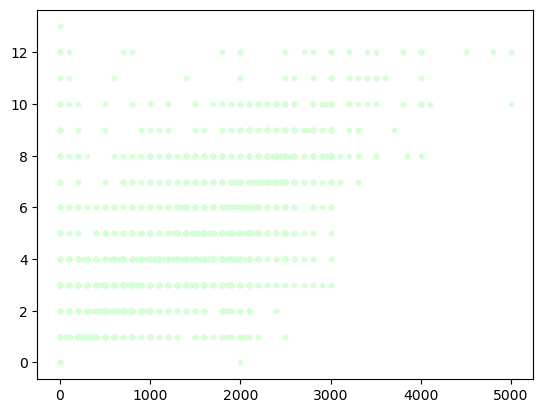

Indice di correlazione: 0.5798261405439517


In [ ]:
def_level = data[["DEF", "LEVEL"]].dropna()
def_ = def_level["DEF"]
level = def_level["LEVEL"]

plt.scatter(def_, level, color='#d5ffd5', marker=".")
#plt.savefig("scatter_def.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

print(f"Indice di correlazione: {def_.corr(level)}")

### Conclusioni

Notiamo come nella relazione `LEVEL-ATK` abbiamo un indice di correlazione discreto, poco oltre il valore $0.72$, quindi potrebbe esserci una sorta di relazione diretta tra il livello di una carta e il suo valore corrispondente di attacco

Diverso il discorso invece per la relazione `LEVEL-DEF`, dove abbiamo un valore sotto la soglia della sufficienza, che ci dà poche informazioni sul tipo di relazione tra questi due campi

## Attacco e difesa

### Attacco

Lo abbiamo citato poco fa: l'**attacco** è una componente fondamentale delle carte mostro poichè è con questa statistica che i mostri si combattono e decretano il vincitore

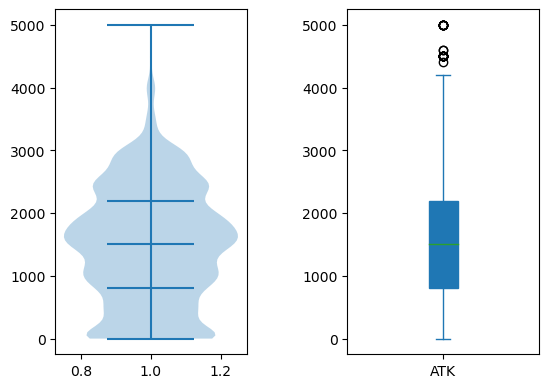

Primo quartile: 800.0
Terzo quartile: 2200.0
Massimo valore di attacco: 5000.0


In [ ]:
atk = data["ATK"].dropna()

plt.subplot(1,2,1)
plt.violinplot(atk, showmedians=True, quantiles=[.25,.75])

plt.subplot(1,2,2)
atk.plot.box(patch_artist=True)

plt.tight_layout(pad=4)
plt.show()

#plt.savefig("def.png", dpi=300, bbox_inches='tight', transparent=True)
print(f"Primo quartile: {atk.quantile(.25)}\nTerzo quartile: {atk.quantile(.75)}\nMassimo valore di attacco: {max(atk)}")

Notiamo come il $50$\% dei mostri si trova nella fascia dagli $800$ ai $2200$ punti di attacco, quindi in un range di $1400$ punti

Nel range dai $2200$ ai $5000$ punti abbiamo il $25$\% dei mostri, come anche nel range da $0$ a $800$ punti, ma come densità ne abbiamo sicuramente di più nell'ultimo caso

Questo è dato dal fatto che le carte con elevatissimi valori di attacco sono più rare, visto che è una caratteristica così fondamentale del gioco

### Difesa

Come per l'attacco, anche la **difesa** è una componente fondamentale del gioco, poichè va a definire quanto una carta è resistente se attaccata da un'altra

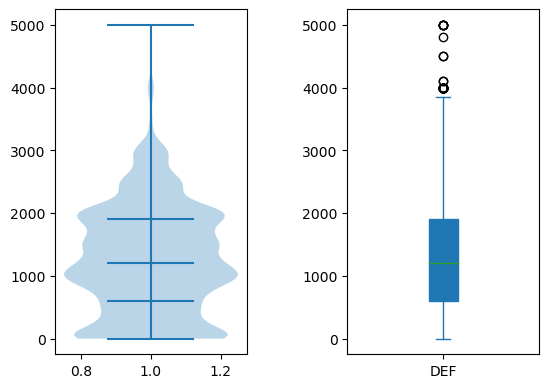

Primo quartile: 600.0
Terzo quartile: 1900.0
Massimo valore di difesa: 5000.0


In [ ]:
def_ = data["DEF"].dropna()

plt.subplot(1,2,1)
plt.violinplot(def_, showmedians=True, quantiles=[.25,.75])

plt.subplot(1,2,2)
def_.plot.box(patch_artist=True)

plt.tight_layout(pad=4)
plt.show()

#plt.savefig("def.png", dpi=300, bbox_inches='tight', transparent=True)
print(f"Primo quartile: {def_.quantile(.25)}\nTerzo quartile: {def_.quantile(.75)}\nMassimo valore di difesa: {max(def_)}")

Notiamo come il $50$\% dei mostri si trova nella fascia dagli $600$ ai $1900$ punti di attacco, quindi in un range di $1300$ punti

Nel range dai $1900$ ai $5000$ punti abbiamo il $25$\% dei mostri, come anche nel range da $0$ a $600$ punti, ma come densità ne abbiamo sicuramente di più nell'ultimo caso

Questo è dato dal fatto che le carte con elevatissimi valori di difesa sono ancora più rare delle carte con attacco elevato: infatti, una carta con attacco $\mathbb{X}$ che attacca una carta con difesa $\mathbb{Y}$, con $\mathbb{X} < \mathbb{Y}$, non la distruggerà mai, e quindi per questo tipo di esigenza non sono state create molte carte con difesa elevatissima

### Confronto tra attacco e difesa

Vediamo un subplot che racchiude due istogrammi, uno per l'attacco e uno per la difesa

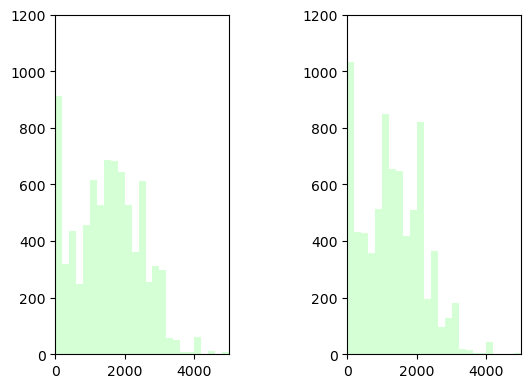

In [ ]:
xmax = max(max(atk), max(def_))
ymax = 1200

plt.subplot(1,2,1)
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.hist(atk, bins=25, color='#d5ffd5')

plt.subplot(1,2,2)
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.hist(def_, bins=25, color='#d5ffd5')

plt.tight_layout(pad=4)
plt.show()
#plt.savefig("istogramma.png", dpi=300, bbox_inches='tight', transparent=True)

Andiamo a osservare i valori medi di attacco e difesa

In [ ]:
atk.mean(), def_.mean()

(1488.790869833436, 1258.2321729002201)

Come ci aspettavamo, il valore medio dell'attacco è più alto rispetto al valore medio della difesa

### Statistiche nulle

Dagli istogrammi precedenti notiamo moltissime carte che hanno statistica $0$ in una dei due campi

In [368]:
atk_def = data[["ATK", "DEF"]].dropna()

zero_atk = sum(atk_def["ATK"] == 0)
zero_def = sum(atk_def["DEF"] == 0)
all_zero = sum((atk_def["ATK"] == 0) & (atk_def["DEF"] == 0))

print(f"Attacco nullo: {zero_atk}, il {np.round(zero_atk * 100 / len(atk_def), 2)}%")
print(f"Difesa nulla: {zero_def}, il {np.round(zero_def * 100 / len(atk_def), 2)}%")
print(f"Entrambi nulli: {all_zero}, il {np.round(all_zero * 100 / len(atk_def), 2)}%")

Attacco nullo: 665, il 8.61%
Difesa nulla: 819, il 10.6%
Entrambi nulli: 373, il 4.83%


## Prezzo di vendita

L'ultima analisi che andiamo a fare riguarda i **prezzi di vendita**: andremo ad osservare **prezzo** minimo, medio e massimo di ogni venditore principale

Dobbiamo prima ad andare a escludere dei valori fastidiosi come $0$ e $999.00$, usati per indicare rispettamente l'assenza di prezzo oppure un prezzo molto molto elevato, come nel caso di `Anotherverse Dragon`, che viene indicato con prezzo $999.99$ ma viene venduto online a prezzi molto superiori

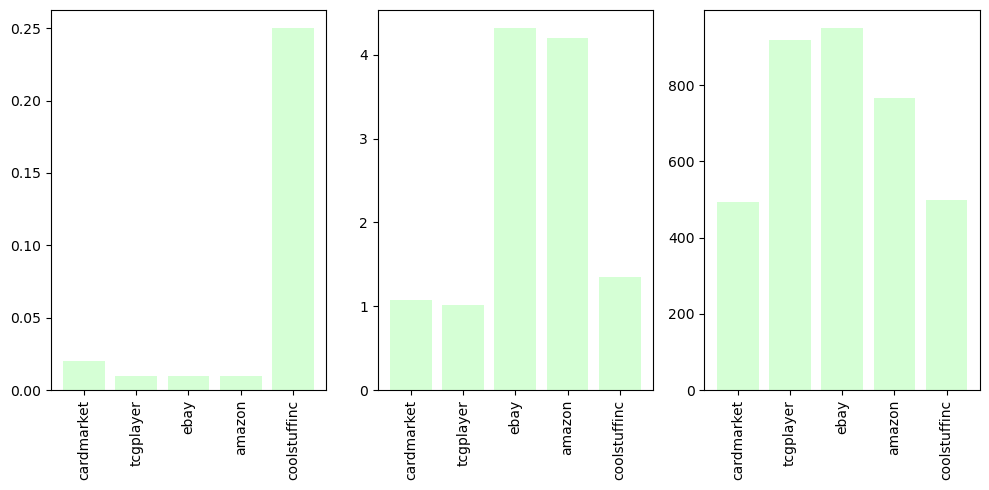

In [ ]:
cardmarket = data["CARDMARKET_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
tcgplayer = data["TCGPLAYER_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
ebay = data["EBAY_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
amazon = data["AMAZON_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)
coolstuffinc = data["COOLSTUFFINC_PRICE"].dropna().where(lambda x : x > 0).where(lambda x: x < 999.00)

stores = [cardmarket, tcgplayer, ebay, amazon, coolstuffinc]
xticks = ["cardmarket", "tcgplayer", "ebay", "amazon", "coolstuffinc"]
x = np.arange(0, len(stores))

plt.subplot(1,3,1)
y = [store.min() for store in stores]
plt.bar(x, y, color="#d5ffd5")
plt.xticks(x, xticks, rotation=90)

plt.subplot(1,3,2)
y = [store.mean() for store in stores]
plt.bar(x, y, color="#d5ffd5")
plt.xticks(x, xticks, rotation=90)

plt.subplot(1,3,3)
y = [store.max() for store in stores]
plt.bar(x, y, color="#d5ffd5")
plt.xticks(x, xticks, rotation=90)

plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()
#plt.savefig("price.png", dpi=300, bbox_inches='tight', transparent=True)

Analizziamo i singoli plot:
- **prezzo minimo**: il venditore `coolstuffinc` è quello con il prezzo minimo più alto, ben 25 volte il prezzo minimo che possiamo trovare negli altri venditori
- **prezzo medio**: il venditore `ebay` è quello con il prezzo medio più alto, ma rispetto a prima siamo più bassi come "moltiplicatore", con un valore che si sofferma poco oltre i 4 punti, rispetto al prezzo minimo della categoria
- **prezzo massimo**: il venditore `ebay` è quello con il prezzo medio più alto, con un fattore moltiplicativo inferiore al 2 rispetto al prezzo minimo della categoria